In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df=pd.DataFrame(data=df)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df_new=df[['Region','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual','Happiness Score']]
df_new

#In df_new we have excluded the column 'Country' and 'Happiness Rank'.
#We are expecting the country name as user input.
#The happiness rank can be calculated once the happiness scores are sorted.

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Sub-Saharan Africa,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [5]:
label_encoder = preprocessing.LabelEncoder()
df_new['Region']= label_encoder.fit_transform(df_new['Region'])
df_new

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [6]:
df_new.isnull().sum()
#No null columns present

Region                           0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

In [7]:
df.shape

(158, 12)

# EDA

In [8]:
#sns.pairplot(df_new)

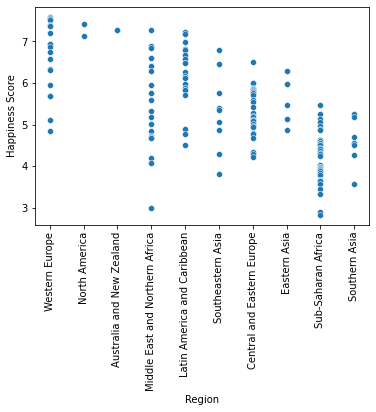

In [9]:
sns.scatterplot(df['Region'],df['Happiness Score'])
plt.xticks(rotation=90)
plt.show()

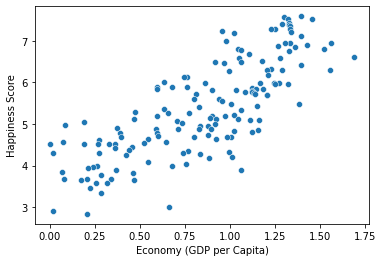

In [10]:
sns.scatterplot(df['Economy (GDP per Capita)'],df['Happiness Score'])
plt.show()

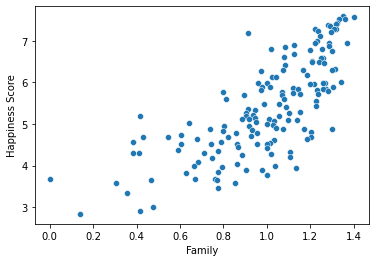

In [11]:
sns.scatterplot(df['Family'],df['Happiness Score'])
plt.show()

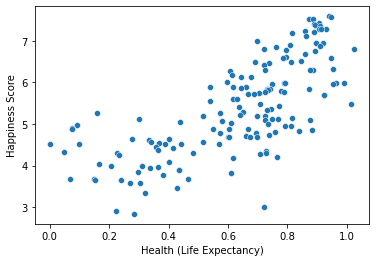

In [12]:
sns.scatterplot(df['Health (Life Expectancy)'],df['Happiness Score'])
plt.show()

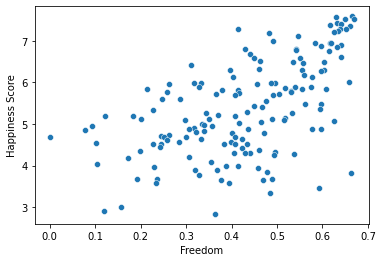

In [13]:
sns.scatterplot(df['Freedom'],df['Happiness Score'])
plt.show()

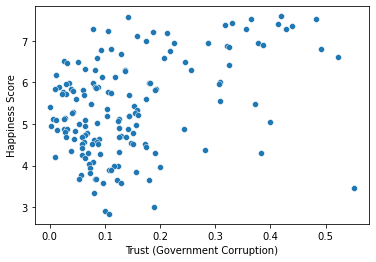

In [14]:
sns.scatterplot(df['Trust (Government Corruption)'],df['Happiness Score'])
plt.show()

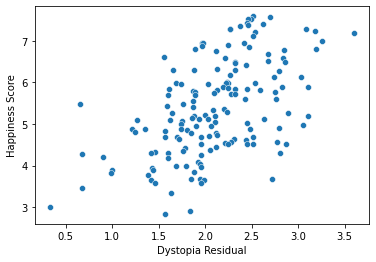

In [15]:
sns.scatterplot(df['Dystopia Residual'],df['Happiness Score'])
plt.show()

<AxesSubplot:>

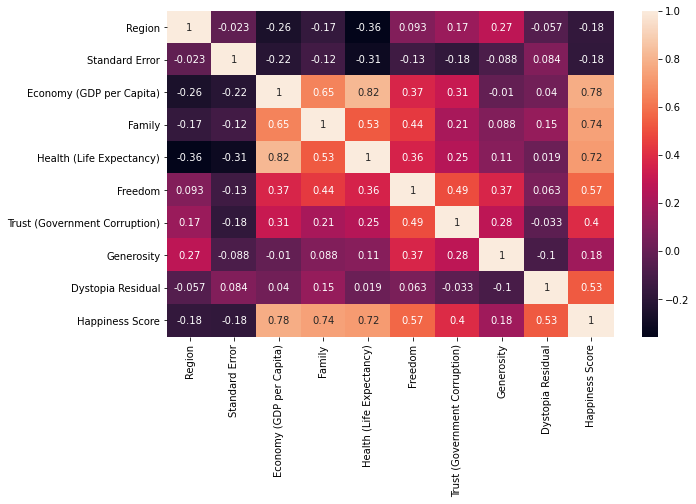

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

In [17]:
df_new.describe()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,2.993321,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,3.000000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,4.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,8.000000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,9.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


In [18]:
df_new.isnull().sum()

#No null value present

Region                           0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

In [19]:
#df_new.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10),color='green')
#plt.show()

In [20]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness threshold is taken as +/-0.65

The columns haning skewness are:-
1. Standard error
2. Family
3. Health (Life expectency)
4. Trust (Government Corruption)
5. Generosity

# Removing Outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z.shape

(158, 10)

In [22]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [23]:
df_new.shape

(158, 10)

Since the number of rows containing outliers is very less as compared to the total number of rows. Hence we will delete the rows containing outliers

In [24]:
df_new=df_new[(z<3).all(axis=1)]

In [25]:
df_new.shape

(149, 10)

# Percentage data loss

In [26]:
print('Loss_percent=',(158-151)/151*100)

Loss_percent= 4.635761589403973


In [27]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

# Trnasforming data to remove skewness

In [28]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.23451354, -0.95033703,  1.49245411, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 1.23451354,  0.37856182,  1.19406711, ...,  0.32967608,
         1.56260401,  1.11116834],
       [ 1.23451354, -1.04140135,  1.26661161, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [ 0.66673577, -1.32081011, -1.36521585, ..., -0.19284339,
         1.13425805, -0.32711524],
       [ 0.95527966, -0.69272644, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 0.95527966,  2.17876604, -1.93874732, ..., -0.14727363,
        -0.17248608, -0.55359236]])

Applying standard scaler to scale all the data present in standard normal distribution

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.23451354, -0.95033703,  1.49245411, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 1.23451354,  0.37856182,  1.19406711, ...,  0.32967608,
         1.56260401,  1.11116834],
       [ 1.23451354, -1.04140135,  1.26661161, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [ 0.66673577, -1.32081011, -1.36521585, ..., -0.19284339,
         1.13425805, -0.32711524],
       [ 0.95527966, -0.69272644, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 0.95527966,  2.17876604, -1.93874732, ..., -0.14727363,
        -0.17248608, -0.55359236]])

# We will be building a regression model

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=10)
print(lsscore.mean())

0.39041515990029485


In [37]:
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=10)
print(lsscore.mean())

0.9076151261616205


In [38]:
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
lr =LinearRegression()
lsscore=cross_val_score(lr,X_,y,cv=10)
print(lsscore.mean())

-9.800061054668829


# Finally we are building a Polynomial Linear Regression model with degree 2

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
lr =LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=42,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print((mean_squared_error(y_test,y_pred))**0.5)

0.02939341009298418


# Now let us find the ramdom state at which the model functions best

In [44]:
rand_state=[]
RMS_error=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rand_state.append(i)
    RMS_error.append((mean_squared_error(y_test,y_pred))**0.5)

print(rand_state)
print(RMS_error)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.09875844359148833, 0.027158007076728056, 0.039544211392891875, 0.03549381885589192, 0.033282176889015795, 0.0484919863219693, 0.03750383514922855, 0.03576783688779008, 0.03867384810690857, 0.031647778510451315, 0.036276871432913235, 0.030772528543026905, 0.03282212125619083, 0.04316513737905248, 0.03433251518732647, 0.04279459190992497, 0.027630563687456394, 0.031833574650127525, 0.04020038711679124, 0.04130080270734738, 0.029215152257108853, 0.04197114176886803, 0.04309851212815849, 0.036061222280500516, 0.03242795246074209, 0.04223678204647074, 0.03401305638034365, 0.17190599024589537, 0.032660806

In [47]:
RMS_error=np.array(RMS_error)
RMS_error.min()

0.025003800028668508

In [52]:
RMS_error[70]

#HEnce arror is minimum when randomstate is 70

0.025003800028668508

# This is the final model

In [53]:
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
lr =LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X_,y,random_state=70,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print((mean_squared_error(y_test,y_pred))**0.5)

0.025003800028668508


# MODEL Saving

In [54]:
import pickle
filename='inhouse_happiness.pkl'
pickle.dump(lr,open(filename,'wb')) #open a file named as inhouse_happiness and dump the model into it